In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importo le librerie che mi servono
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Creo una variabile e la inizializzo con il csv + display del dataset
ds = pd.read_csv('https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/boston_housing/BostonHousing.csv', sep = ',', encoding = 'latin1')
display(ds)

# # Check se il dataset ha valori null
#display(ds.isna())

# Faccio una copia del dataset per lavoraci sopra senza dover intaccare l'originale
ds_copia = ds.copy()

# Rimuovo la colonna Unnamed 0 + display describe
ds_copia = ds_copia.drop("Unnamed: 0", axis=1)
display(ds_copia.describe())

Unnamed: 0     CRIM    ZN  INDUS    NOX     RM        AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31  0.538  6.575  65.200000  4.0900    1   
1             1  0.02731  12.5   7.07  0.469  6.421  78.900000  4.9671    2   
2             2  0.02729  12.5   7.07  0.469  7.185  61.100000  4.9671    2   
3             3  0.03237  12.5   2.18  0.458  6.998  45.800000  6.0622    3   
4             4  0.06905  12.5   2.18  0.458  7.147  54.200000  6.0622    3   
..          ...      ...   ...    ...    ...    ...        ...     ...  ...   
501         501  0.06263  12.5  11.93  0.573  6.593  69.100000  2.4786    1   
502         502  0.04527  12.5  11.93  0.573  6.120  76.700000  2.2875    1   
503         503  0.06076  12.5  11.93  0.573  6.976  91.000000  2.1675    1   
504         504  0.10959  12.5  11.93  0.573  6.794  89.300000  2.3889    1   
505         505  0.04741  12.5  11.93  0.573  6.030  68.518519  2.5050    1   

     TAX  PTRATIO       B      LSTAT  MEDV  
0    296     15.3  396.90   4.980000  24.0  
1    242     17.8  396.90   9.140000  21.6  
2    242     17.8  392.83   4.030000  34.7  
3    222     18.7  394.63   2.940000  33.4  
4    222     18.7  396.90  12.715432  36.2  
..   ...      ...     ...        ...   ...  
501  273     21.0  391.99  12.715432  22.4  
502  273     21.0  396.90   9.080000  20.6  
503  273     21.0  396.90   5.640000  23.9  
504  273     21.0  393.45   6.480000  22.0  
505  273     21.0  396.90   7.880000  11.9  

[506 rows x 14 columns]

CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.472349   20.156126   11.083992    0.554695    6.284634   68.518519   
std      8.573458   18.890548    6.699165    0.115878    0.702617   27.439466   
min      0.006320   12.500000    0.460000    0.385000    3.561000    2.900000   
25%      0.081900   12.500000    5.190000    0.449000    5.885500   45.925000   
50%      0.224635   12.500000    9.900000    0.538000    6.208500   74.450000   
75%      2.808720   12.500000   18.100000    0.624000    6.623500   93.575000   
max     88.976200  100.000000   27.740000    0.871000    8.780000  100.000000   

              DIS         RAD         TAX     PTRATIO           B       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.795043    9.549407  408.237154   18.455534  356.674032   12.715432   
std      2.105710    8.707259  168.537116    2.164946   91.294864    7.012739   
min      1.129600    1.000000  187.000000   12.600000    0.320000    1.730000   
25%      2.100175    4.000000  279.000000   17.400000  375.377500    7.230000   
50%      3.207450    5.000000  330.000000   19.050000  391.440000   11.995000   
75%      5.188425   24.000000  666.000000   20.200000  396.225000   16.570000   
max     12.126500   24.000000  711.000000   22.000000  396.900000   37.970000   

             MEDV  
count  506.000000  
mean    22.532806  
std      9.197104  
min      5.000000  
25%     17.025000  
50%     21.200000  
75%     25.000000  
max     50.000000

In [3]:
# Analisi Esplorativa (EDA)
ds_copia.hist(figsize = (20,15))
plt.xlabel("Valore mediano delle abitazioni occupate dai proprietari in migliaia di dollari")
plt.ylabel("Case")
plt.title("MEDV Distribution")

Text(0.5, 1.0, 'MEDV Distribution')

In [4]:
# Matrice di correlazione
correlation_matrix = ds_copia[['CRIM','ZN','INDUS','NOX','RM','AGE','DIS', 'RAD', 'TAX','PTRATIO','B','LSTAT', 'MEDV']].corr()
plt.figure(figsize=(13,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice di Correlazione')
plt.show()

La colonna con una migliore correlazione positiva e' RM, mentre la colonna con la migliore correlazione negativa e' LSTAT


In [5]:
# Visualizzazione delle correlazioni (colonna target: MEDV)
corr_labels = correlation_matrix['MEDV'].sort_values(ascending = False)
print(corr_labels)

MEDV       1.000000
RM         0.695360
ZN         0.334583
B          0.333461
DIS        0.249929
AGE       -0.380223
RAD       -0.381626
CRIM      -0.384049
NOX       -0.427321
TAX       -0.468536
INDUS     -0.478657
PTRATIO   -0.507787
LSTAT     -0.721975
Name: MEDV, dtype: float64


In [9]:
# Visualizzazione grafica tra la colonna target e la colonna con l'indice di correlazione più elevato #
plt.figure(figsize=(8,6))
plt.scatter(ds_copia['MEDV'], ds_copia['RM'], alpha=0.1)
plt.xlabel("MEDV")
plt.ylabel("RM")
plt.show()

In [10]:
ds_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   RAD      506 non-null    int64  
 8   TAX      506 non-null    int64  
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


In [11]:
# Eliminazione degli outlier #
display(ds_copia['RM'].describe())

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

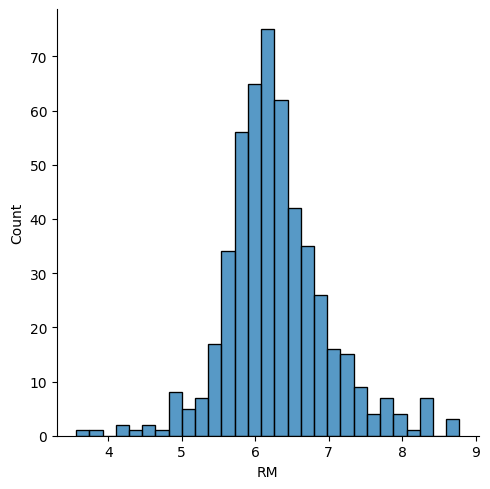

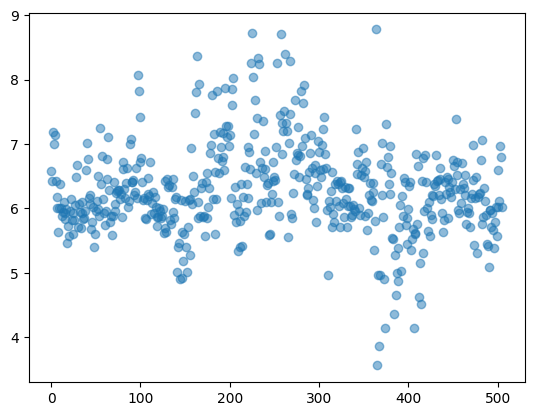

In [13]:
# Visualizzazione grafica dei valori della colonna RM
sns.displot(ds_copia["RM"])
plt.show()

rm = ds_copia["RM"].to_numpy()

plt.scatter(np.arange(rm.size), rm, alpha=0.5)
plt.show()

In [14]:
rm_up_limit  = rm.mean() + ( rm.std() * 3 )
rm_low_limit = rm.mean() - ( rm.std() * 3 )

print("limite superione", rm_up_limit)
print("limite inferione", rm_low_limit)

limite superione 8.390401930355486
limite inferione 4.178866844348072


In [15]:
rm[rm > rm_up_limit]  = rm_up_limit
rm[rm < rm_low_limit] = rm_low_limit
display(ds_copia['RM'].describe())

count    506.000000
mean       6.284575
std        0.689062
min        4.178867
25%        5.885500
50%        6.208500
75%        6.623500
max        8.390402
Name: RM, dtype: float64